# PCA and Linear Regression

In this notebook we'll take a look at how dimension reduction can help us visualize and work with data in multiple dimensions more easily. 

## Why PCA?

Principial Component Analysis (more commonly referred to as PCA), is a way to get approximations of our data in a lower number of dimensions than we originally started with. If you're wondering why we might need this, consider trying to visualize a four-dimensional graph. It's impossible! That is where PCA comes in, as it could allow us to get one, two, or three-dimensional approximations of this four dimensional data.

## How Does it Work?

For those unfamiliar with the terminology of dimensions in data, the number of dimensions in our data is the same as the number of variables. So if I have observations with the variables age, gestation, and weight, then my data has three dimensions.

To better understand PCA (using SVD), let's go through an example. Imagine we have a two-dimensional dataset of numerical variables that can be plotted in a scatterplot fashion. For reasons I will explain in a moment, we transform the datapoints so that they are centered around the origin (but their positions relative to each other will stay the same). We then try to fit a trendline to this data by minimizing the sum of squared distances from the datapoints to the line. We'd do this by picking a random line that goes through the origin, and then assessing the fit of the line by projecting the points onto the line, and measuring the distance from the original point to the projected point. But wait, what's projection? Also that was really long and confusing, so let's take a couple steps back. To project a point onto a trendline, we draw a line from the point to the trendline, ensuring that it is perpendicular to the trendline. The point where the perpendicular line meets the trendline is the position of the projected point. This is shown below:

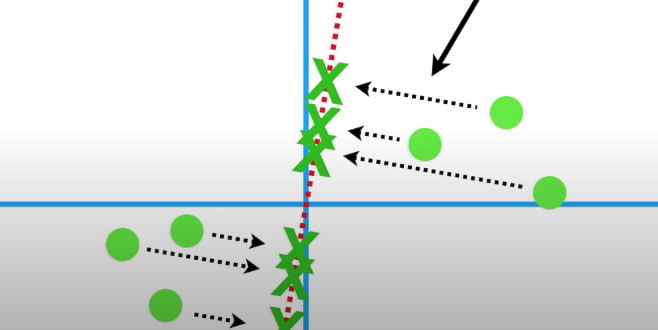

_Image from "StatQuest: Principal Component Analysis (PCA), Step-by-Step" linked in resources section_

So, now that we know what projection is, to reiterate, we find the distance from the original point to the projected point and try to minimize it. This is equivalent, however, to trying to maximize the distance of the projected points from the origin (which we can prove using some math I won't go into). This is computationally easier than computing the distance between two points that are not at the origin. We could also call this process trying to find the line that maximizes the spread of the data. Regardless, this line is called the first principal component. To find the second principal component (and there will only be two for a two-dimensional dataset), we draw a line that is perpendicular to the first component and that goes through the origin. These two principle components represent a set of axes that we can use to view our data.

We just found new two-dimensional axes to display our data on, but how can we lower the dimension of the data? Principal components are not equally important. The first principal component will give us the most useful information about the spread of our data, while subsequent components will usually explain much less of the variation in our data. So if I wanted to project two-dimensional data down to one dimension while still retaining the most relevant features of the data, I would just project the data onto the first principal component. 

## Three Dimensions?

Of course the main reason we use PCA is to push data that has three or more dimensions down to a number of dimensions that we can visualize more easily. The process outlined above works for three dimensions the same way it works for two. We find the line of best fit for the data centered at the origin. Then we find the line that is perpendicular to that line and is still centered at the origin. Then we find the line that is perpendicular to that line and centered at the origin. We then have three principal components, and we can use the most important components to get the best one or two-dimensional representation of the data by projecting the data onto those components. 

## PCA for regression?

Now that we have some intuition of how PCA works, let's discuss how we can use it for the whole theme of this portfolio: linear regression!

It's sort of weird thinking about using PCA for linear regression, when PCA already sort of uses linear regression to find the components (line of best fit is component 1), sort of like linear regression inception. But I digress. When we have data that is of high dimensionality (or just higher than we're comfortable plotting), we can use PCA to dimension reduce our data. We can then perform linear regression on the projected data to find a line of best fit.

Let's go back to the babies data set from earlier. We can use the combination of variables that we obtained from the notebook discussing cross-validation. Remember that these variables were the best combination of explanatory variables for predicting infant birth weight. We'll import the data and grab those variables below:

In [2]:
# Import Block
%matplotlib notebook

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
babies_wrangled = pd.read_csv("babies_wrangled.csv")
babies_cv = babies_wrangled.loc[:, ["gestation", "race", "age", "wt"]]
babies_np = babies_cv.to_numpy()

For this next part, we will go over how to use sklearn's implementation of PCA to dimension reduce our data. In order to use PCA on our data, we first need to standardize it. We do this by centering our data around the origin and ensuring that our data has a standard deviation of one:

In [5]:
def standardize(data):
    ## Data must be passed as np array
    
    # Standardizing our variables:
    mean_vec = np.mean(data, axis = 0)
    sd_vec = np.std(data, axis = 0)

    data_std = data.copy()

    for i in range(data.shape[1]):
        data_std[:, i] = (data[:, i]- mean_vec[i]*np.ones(data.shape[0]))/sd_vec[i]
        
    return data_std

In [6]:
babies_std = standardize(babies_np)

Next, we can define a PCA model and fit that model to our data:

In [7]:
# Step one: Set up PCA by defining the number of components 
pca_alg = PCA(n_components = 4)

# Step two: Fit the algorithm to the standardized data
pfit = pca_alg.fit(babies_std)

# To access the components, we call pfit.components_
print("Shape of the resulting components\n", pfit.components_.shape)

print("\n Actual components \n",pfit.components_)

Shape of the resulting components
 (4, 4)

 Actual components 
 [[-0.76991282  0.11885942  0.02589849 -0.62644708]
 [ 0.08182558  0.56969197  0.8167317   0.04129129]
 [ 0.18471921  0.79554877 -0.56838843 -0.09957685]
 [-0.6053244   0.16859907 -0.09598538  0.77197379]]


We now have four principle components for our data. The components have four numbers each for projecting the four variables in our dataset. But we haven't actually projected the data to a different dimensional space. For this, we need to use transform:

In [8]:
# Step three: Transform the data. 
# (This step is what actually projects the data onto the components)
babies_infour = pca_alg.transform(babies_std)
babies_infour

array([[ 0.18860673,  1.00791651,  1.4831011 ,  0.30115136],
       [-0.04911211, -0.13146743, -0.10799645, -0.03604677],
       [-0.04911211, -0.13146743, -0.10799645, -0.03604677],
       ...,
       [-0.04911211, -0.13146743, -0.10799645, -0.03604677],
       [-0.0750106 , -0.94819913,  0.46039199,  0.05993861],
       [-0.79312645,  0.76708985, -0.49166567, -0.73735656]])

So that's what the babies dataset looks like in four dimensions, but wasn't the whole point of doing this process to get a lower-dimensional approximation of our data? Right, and to do this, we can use only the first n components (to get an n-dimensional approximation of our data) to project our data. For example, to get the two-dimensional approximation of our data, we could specify fit and transform differently as follows:

In [9]:
pca_alg2 = PCA(n_components = 2)

pfit2 = pca_alg2.fit(babies_std)

babies_intwo = pca_alg2.transform(babies_std)
babies_intwo

array([[ 0.18860673,  1.00791651],
       [-0.04911211, -0.13146743],
       [-0.04911211, -0.13146743],
       ...,
       [-0.04911211, -0.13146743],
       [-0.0750106 , -0.94819913],
       [-0.79312645,  0.76708985]])

We can visualize this two-dimensional approximation of our data as follows:

<IPython.core.display.Javascript object>


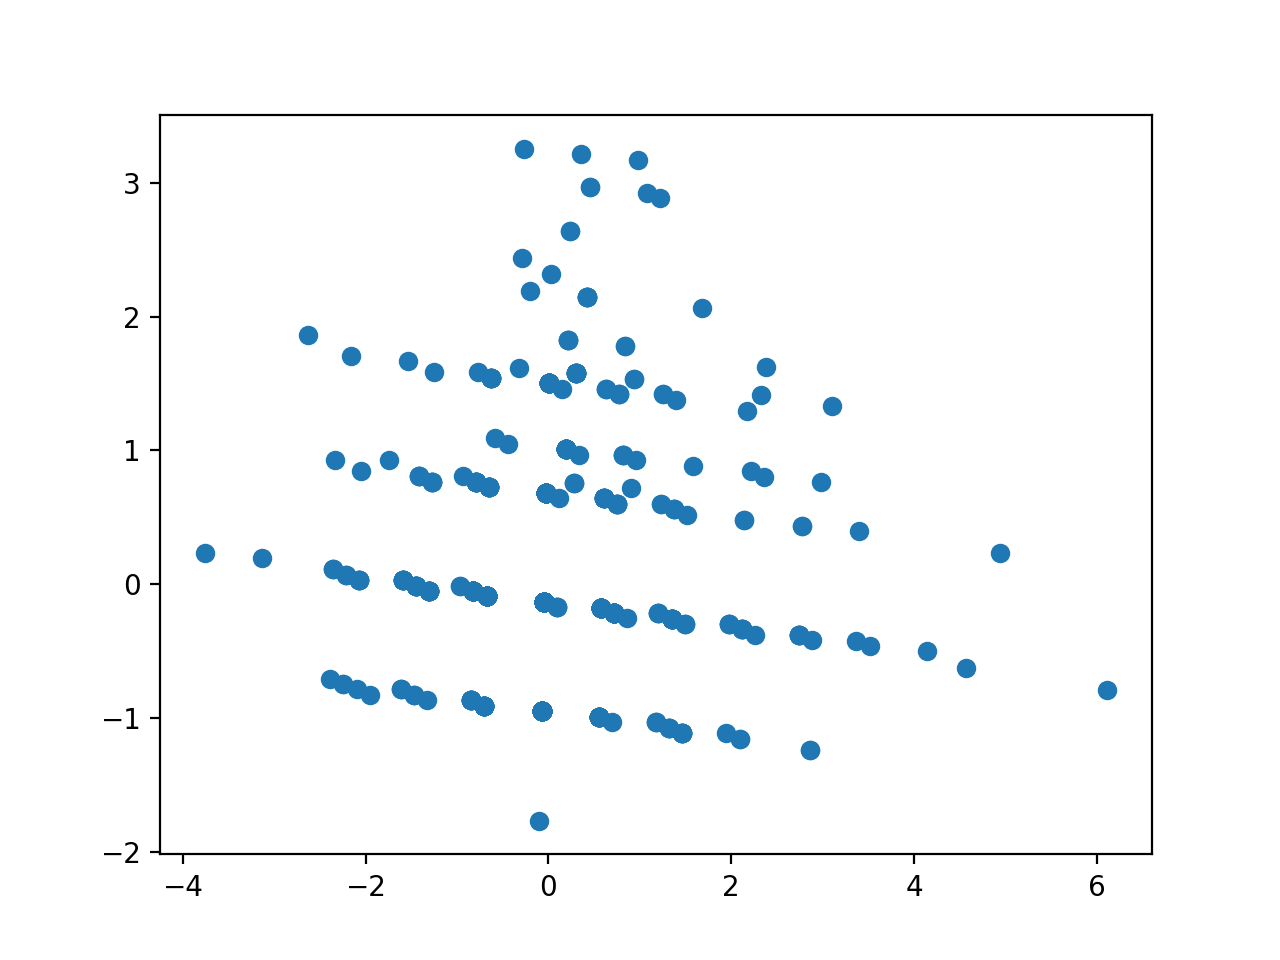

In [11]:
plt.scatter(babies_intwo[:, 0], babies_intwo[:, 1], )

This plot may look odd, but it is the best representation we have of our data in a two-dimensional space. However, our original data wasn't centered at 0, so how can we account for this in our new plot? We can undo the standardizing we did earlier and re-plot the data using the code below:

In [12]:
def unstandardize(projected_data, original_data):
    ## Data must be passed as np array
    
    # Unstandardizing our variables:
    mean_vec = np.mean(original_data, axis = 0)
    sd_vec = np.std(original_data, axis = 0)
    
    data_undo = projected_data.copy()
    
    for i in range(projected_data.shape[1]):
        data_undo[:,i] = projected_data[:,i]*sd_vec[i]+mean_vec[i]
    
    return data_undo

In [13]:
babies_real = unstandardize(babies_intwo, babies_np)

<IPython.core.display.Javascript object>


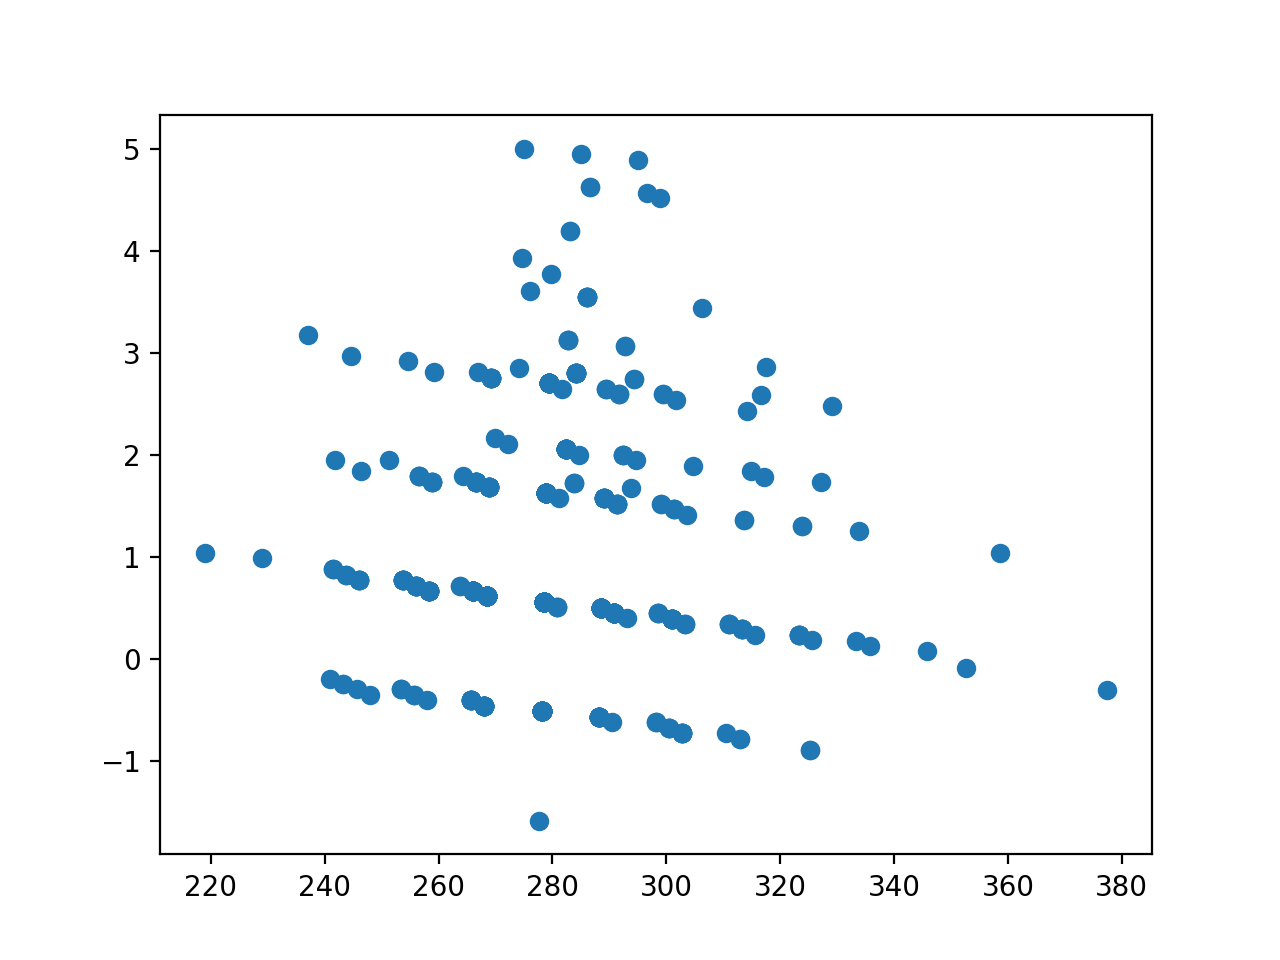

In [14]:
plt.scatter(babies_real[:, 0], babies_real[:, 1])

You might be wondering at this point what the right number of dimensions to pick is. For this, we can use the percent of the variation in the data that is explained by each principal component:

<IPython.core.display.Javascript object>


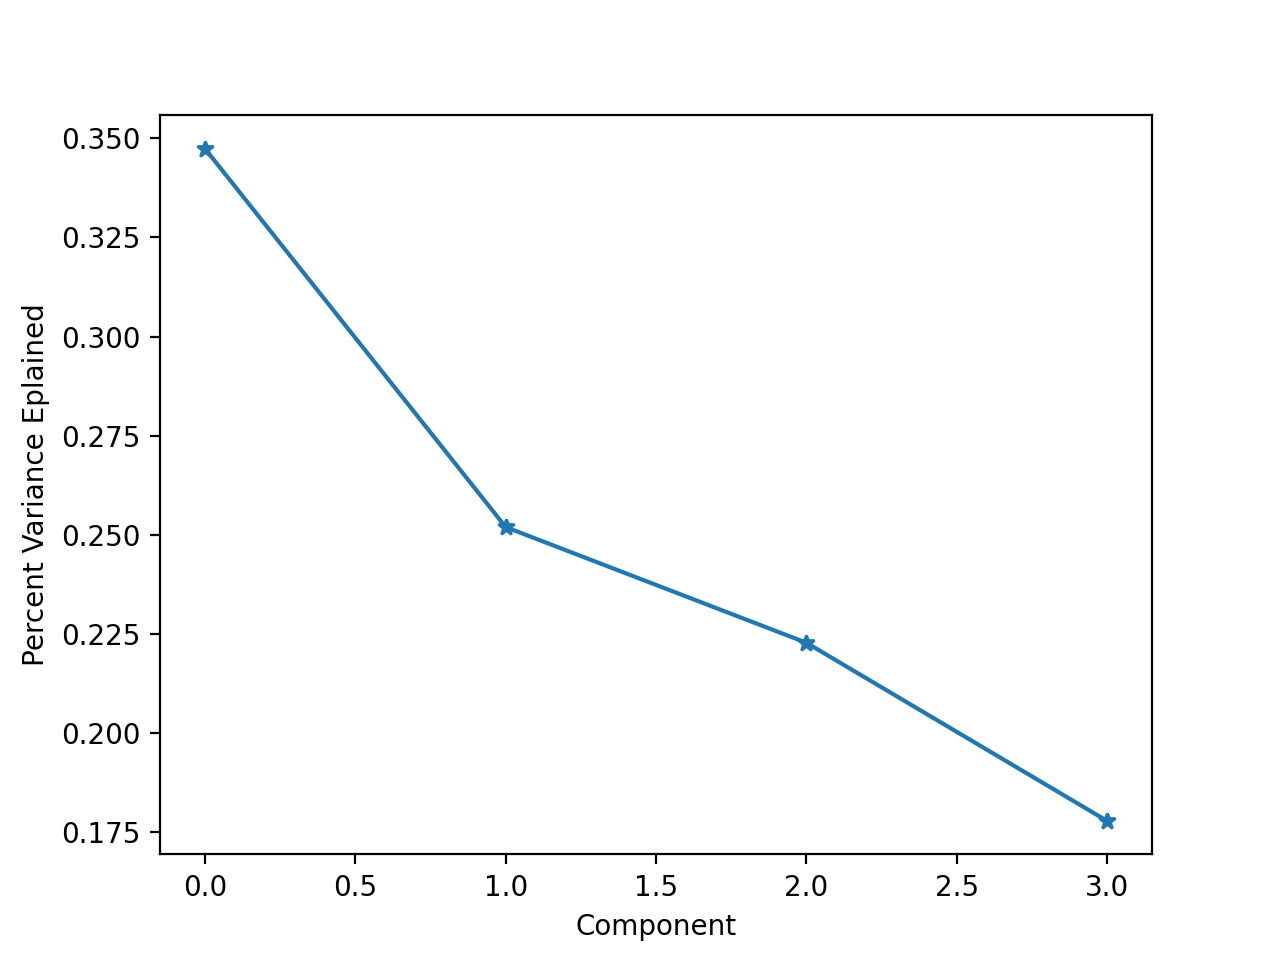

Text(0, 0.5, 'Percent Variance Eplained')

In [16]:
plt.plot(pfit.explained_variance_ratio_, marker='*')
plt.xlabel("Component")
plt.ylabel("Percent Variance Eplained")

<IPython.core.display.Javascript object>


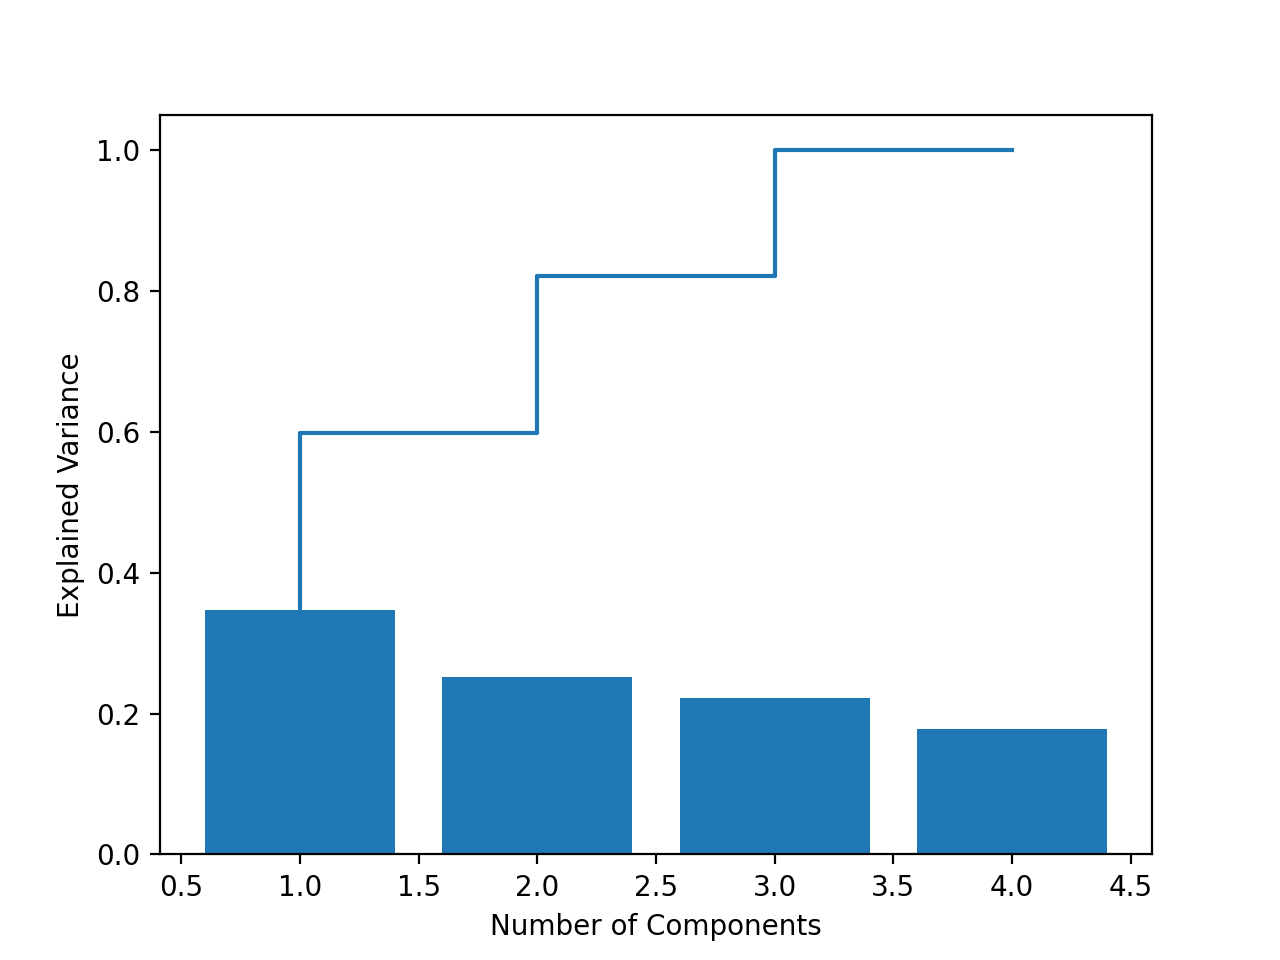

Text(0, 0.5, 'Explained Variance')

In [17]:
cum_variance = np.cumsum(pfit.explained_variance_ratio_)

plt.step(range(1,5),cum_variance)
plt.bar(range(1,5),pfit.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")

# Plot based on image on Page 148 in _Python Machine Learning_

What these plots are telling us is how much of the spread of the data is explained by each principle component. We can see that when we use the first two principle components, we are only encapsulating about 60% of the spread in the original data, meaning that our two-dimensional approximation of the babies data we're working with is probably not a very good one. Nonetheless, when the first two principle components capture more of the spread of the data (than 60%), projecting high-dimensional data down to lower dimensions for visualization purposes can be very informative.

## Regression

Now that we have our (admittedly not that great) approximation of our four-dimensional data in two-dimensions, we can perform linear regression on it:

m is 2.3803005009075812e-17 b is 0.7305785123966877


<IPython.core.display.Javascript object>


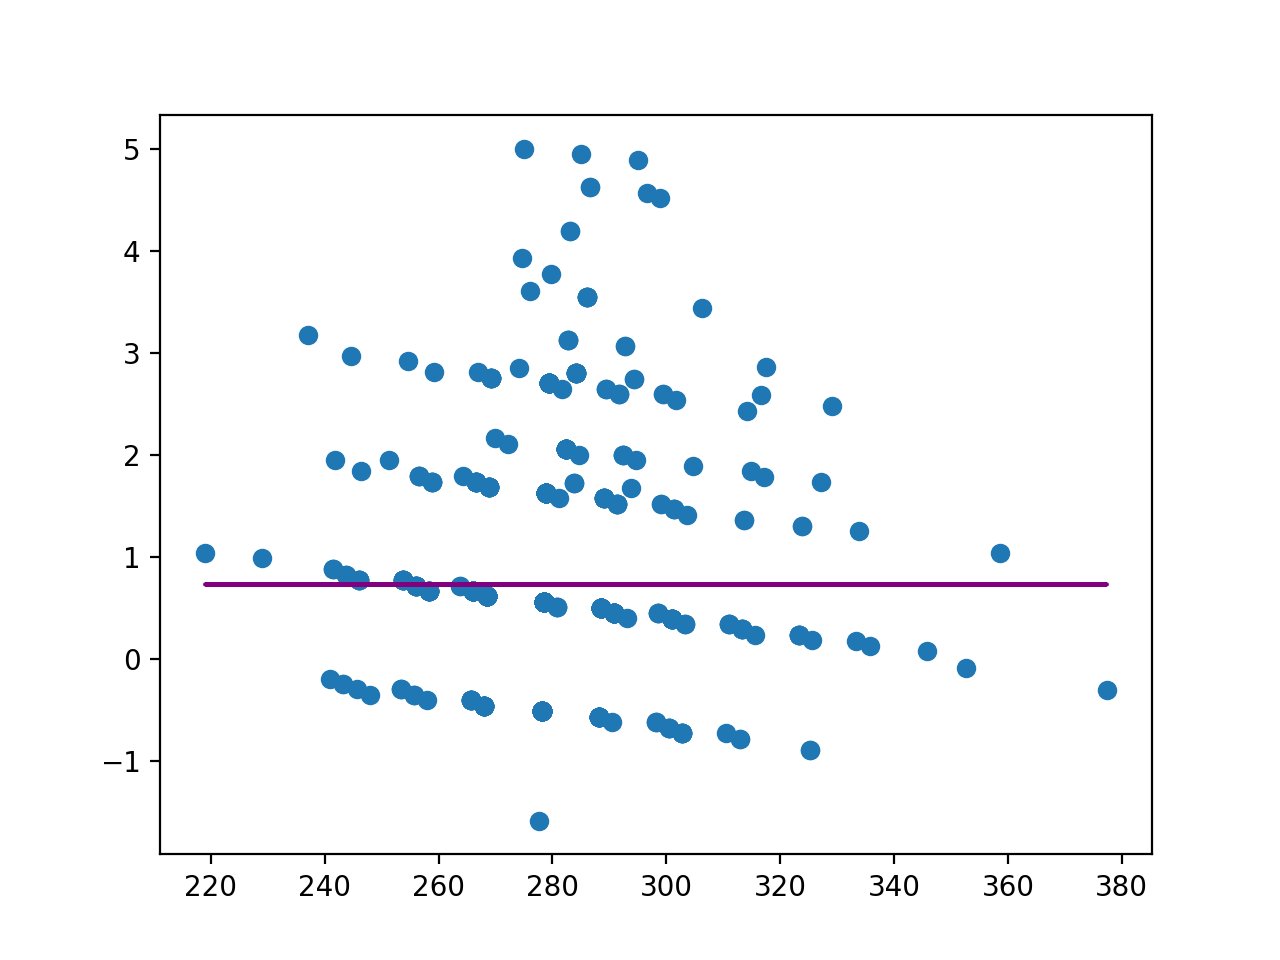

In [19]:
lm = linear_model.LinearRegression()
mod = lm.fit(babies_real[:, 0].reshape(-1, 1), babies_real[:, 1])
print("m is", mod.coef_[0], "b is", mod.intercept_)

plt.scatter(babies_real[:, 0], babies_real[:, 1])
plt.plot(babies_real[:, 0], mod.predict(babies_real[:, 0].reshape(-1, 1)), color = 'purple')

Interestingly enough, it looks like there's basically no correlation in the two-dimensional approximation of our data, meaning that maybe the cross-validation error we got in the cross-val notebook was actually high, but just happened to be lower than the rest of the cross-val errors we got. This means that it's possible this combination of variables isn't really that good at predicting birth weight after all. However, it is still important to note that this approximation of our data only accounts for 60% of the variation in the original data set, so perhaps we can't make such strong conclusions

## Conclusion

Using PCA, we were able to find that perhaps the combination of variables we were using to predict birth weight wasn't actually that good at predicting birth weight, despite the result we got in the cross-val error notebook. Of course we can't be sure of this without doing more statistical analysis, but this does provide a clue of what we might want to test/look at (like p values for t tests with coefficients). However, we were able to actually get some idea of what our data looks like, which is something we were not able to do when we just had our four-dimensional data set. Below I've created a function that takes a data set, desired number of dimensions, and whether or not the resulting plot should be in the original units of the data. This function performs dimension reduction on the data, plots the resulting data (with a line of best fit if the number of desired dimensions is two), and returns the percent variance that is explained by the lower dimensional approximation. You are welcome to use this on your own data, but note that this function depends on the helper functions defined above.

In [117]:
def dimension_reduction_PCA(data, desired_dimension, plot_std):
    ## Note: data should be passed as np array, desired_dimension should be an int, 
    ## and plot_std should be True or False
    
    # standardize data
    data_std = standardize(data)
    
    # Step one: Set up PCA by defining the number of components 
    pca_alg = PCA(n_components = desired_dimension)

    # Step two: Fit the algorithm to the standardized data
    pfit = pca_alg.fit(data_std)
    
    # Step three: Transform the data. 
    # (This step is what actually projects the data onto the components)
    data_in_nd = pca_alg.transform(data_std)
    
    if plot_std == True:
        data_in_nd = unstandardize(data_in_nd, data)
        
    if desired_dimension == 1:
        plt.scatter(data_in_nd,np.zeros(data_in_nd.shape[0]))
    
    # Adds regression line
    elif desired_dimension == 2:
        plt.scatter(data_in_nd[:, 0], data_in_nd[:, 1])
        
        lm = linear_model.LinearRegression()
        mod = lm.fit(data_in_nd[:, 0].reshape(-1, 1), data_in_nd[:, 1])
        print("m is", mod.coef_[0], "and b is", mod.intercept_)
        
        plt.plot(data_in_nd[:, 0], mod.predict(data_in_nd[:, 0].reshape(-1, 1)), color = 'purple')
    
    elif desired_dimension == 3:
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        # Create the SCATTER() plot 
        ax.scatter(data_in_nd[:,0], data_in_nd[:,1], data_in_nd[:,2]);
    
    total_variation = np.sum(pfit.explained_variance_ratio_)
    
    return total_variation
    

<IPython.core.display.Javascript object>


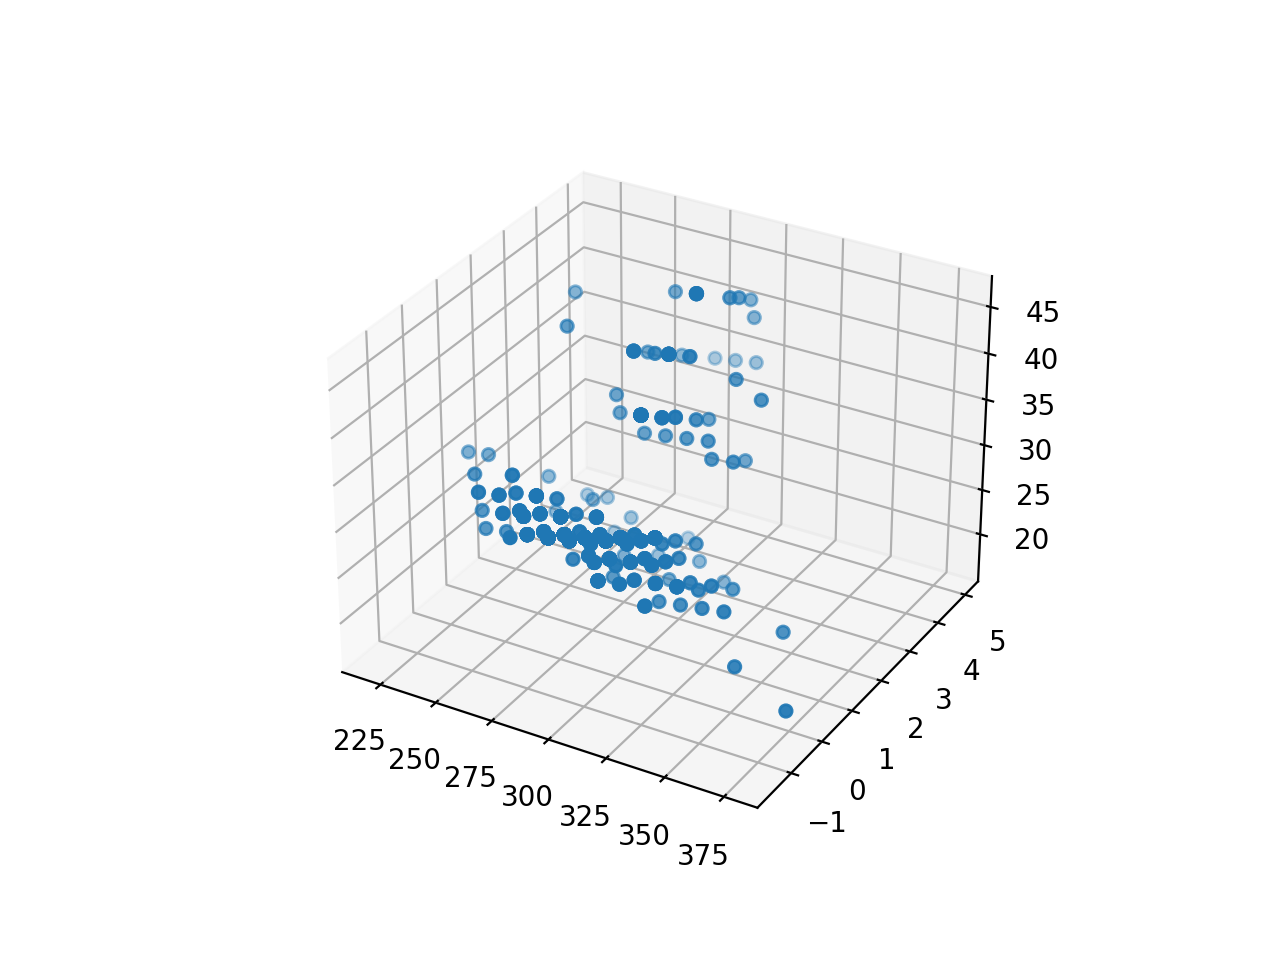

Total explained variance is 0.822079748207361


In [118]:
# You can play with passing different parameters to this function here
dimension_reduction_PCA(babies_np, 3, True)

### Resources Used:

1. Lab 5 from Katherine Kinnaird's Spring 2021 Machine Learning course (CSC 294)
2. Lab 6 from Katherine Kinnaird's Spring 2021 Machine Learning course (CSC 294)
3. https://www.youtube.com/watch?v=FgakZw6K1QQ